### All Data into Geodatabase

In [2]:
#Create local geodatabase
import os
gdb_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(gdb_path)

arcpy.management.CreateFileGDB(gdb_path, "Lab2")

<Result '\\\\Mac\\Home\\Documents\\ArcGIS\\Projects\\MyProject1\\Lab2.gdb'>

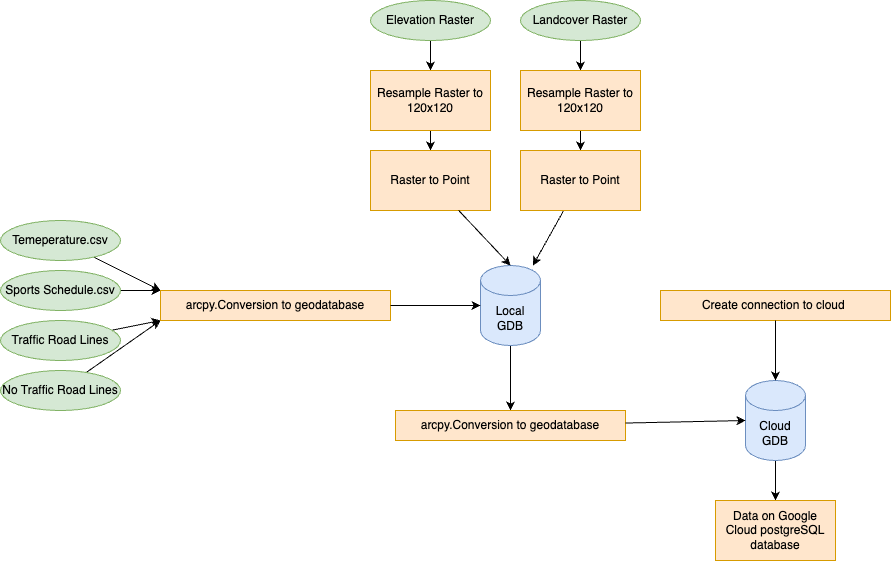

Credit: chat.openai.com

In [29]:
#Create Connection to Cloud Database
import arcpy

gdb_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
arcpy.env.workspace = gdb_path

out_folder_path = arcpy.env.workspace
out_name = "Lab2.sde"
database_platform = "POSTGRESQL"
instance = 
account_authentication = "DATABASE_AUTH"
username = "postgres"
password = 
save_user_pass = "SAVE_USERNAME"
database = "gis5572"

arcpy.management.CreateDatabaseConnection(out_folder_path, out_name, database_platform, instance, account_authentication, username, password, save_user_pass, database)

<Result '\\\\Mac\\Home\\Documents\\ArcGIS\\Projects\\MyProject1\\Lab2.sde'>

In [28]:
#Insert rasters as point data into local geodatase
import os
gdb_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
arcpy.env.workspace = gdb_path

input_raster1 = os.path.join(gdb_path, "Commons_Data", "elev_30m_digital_elevation_model.gdb", "digital_elevation_model_30m")
output_raster1 = os.path.join(gdb_path, "Lab2.gdb", "elevation_sampled")
output_points1 = os.path.join(gdb_path, "Lab2.gdb", "elevation_point")
input_raster2 = os.path.join(gdb_path, "Commons_Data", "NLCD_2019_Land_Cover.tif")
output_raster2 = os.path.join(gdb_path, "Lab2.gdb", "landcover_sampled")
output_points2 = os.path.join(gdb_path, "Lab2.gdb", "landcover_point")

arcpy.management.Resample(
    in_raster=input_raster1,
    out_raster=output_raster1,
    cell_size="9000 9000",
    resampling_type="NEAREST")
print("raster1_resampled")
arcpy.management.Resample(
    in_raster=input_raster2,
    out_raster=output_raster2,
    cell_size="9000 9000",
    resampling_type="NEAREST")
print("raster2_resampled")

arcpy.conversion.RasterToPoint(
    in_raster= output_raster1,
    out_point_features=output_points1,
    raster_field="VALUE")
print("raster1_topoint")
arcpy.conversion.RasterToPoint(
    in_raster= output_raster2,
    out_point_features=output_points2,
    raster_field="VALUE")
print("raster2_topoint")

raster1_resampled
raster2_resampled
raster1_topoint
raster2_topoint


In [3]:
#Put everything else into local geodatabase
arcpy.env.workspace = gdb_path + "\Lab2.gdb"
input_table1 = os.path.join(gdb_path, "temperature_data.csv")
input_table2 = os.path.join(gdb_path, "qaqc_schedule.csv")
input_line1 = os.path.join(gdb_path, "no_traffic_layer_line.shp")
input_line2 = os.path.join(gdb_path, "traffic_layer_line.shp")
arcpy.conversion.FeatureClassToGeodatabase(input_line1, arcpy.env.workspace)
arcpy.conversion.FeatureClassToGeodatabase(input_line2, arcpy.env.workspace)
arcpy.TableToGeodatabase_conversion(input_table1, arcpy.env.workspace)
arcpy.TableToGeodatabase_conversion(input_table2, arcpy.env.workspace)

<Result '\\\\Mac\\Home\\Documents\\ArcGIS\\Projects\\MyProject1\\Lab2.gdb'>

In [30]:
#Put everything into cloud database
#Takes a long time
import os
import arcpy
# Path to current directory
gdb_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(gdb_path)
# Set the workspace environment
arcpy.env.workspace = gdb_path + "\Lab2.gdb"
input_point1 = os.path.join(arcpy.env.workspace, "elevation_point")
input_point2 = os.path.join(arcpy.env.workspace, "landcover_point")
input_table1 = os.path.join(arcpy.env.workspace, "temperature_data")
input_table2 = os.path.join(arcpy.env.workspace, "qaqc_schedule")
input_line1 = os.path.join(arcpy.env.workspace, "no_traffic_layer_line")
input_line2 = os.path.join(arcpy.env.workspace, "traffic_layer_line")
arcpy.env.workspace = gdb_path + "\Lab2.sde"
arcpy.conversion.FeatureClassToGeodatabase(input_line1, arcpy.env.workspace)
print("No Traffic Lines in DB")
arcpy.conversion.FeatureClassToGeodatabase(input_line2, arcpy.env.workspace)
print("Traffic Lines in DB")
arcpy.conversion.FeatureClassToGeodatabase(input_point1, arcpy.env.workspace)
print("Elevation in DB")
arcpy.conversion.FeatureClassToGeodatabase(input_point2, arcpy.env.workspace)
print("Land Cover in DB")
arcpy.TableToGeodatabase_conversion(input_table1, arcpy.env.workspace)
print("Temperature in DB")
arcpy.TableToGeodatabase_conversion(input_table2, arcpy.env.workspace)
print("Sport Schedule in DB")

No Traffic Lines in DB
Traffic Lines in DB
Elevation in DB
Land Cover in DB
Temperature in DB
Sport Schedule in DB
